<a href="https://colab.research.google.com/github/antonioalonsocr/DocAppointmentAttendance/blob/main/DocAppointmentPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Import data and preliminary analysis

In [72]:
doc_df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Project2/DocAppNoShow.csv')
doc_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
(doc_df['No-show']=='Yes').sum()

22319

In [74]:
doc_df['AppointmentID'].duplicated().any()

False

In [75]:
# There are no missing values
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Cleaning data and further analysis

In [76]:
print(datetime.strptime(doc_df['AppointmentDay'][1], '%Y-%m-%dT%H:%M:%SZ'))

2016-04-29 00:00:00


In [77]:
# Changing the type of columns to fit their type;
# From object (string) to a datetime object
doc_df['ScheduledDay'] = pd.to_datetime(doc_df['ScheduledDay'])
doc_df['AppointmentDay'] = pd.to_datetime(doc_df['AppointmentDay'])

In [78]:
doc_df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [79]:
# Now I want to change the values of No-show to binary,
# where 1 indicates the person did not attend the appointment
doc_df['No-show'].replace({'No':'0','Yes':'1'},inplace=True)
doc_df['No-show'] = doc_df['No-show'].astype('int')

In [80]:
doc_df['No-show'].sum()

22319

In [81]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [82]:
doc_df.set_index('AppointmentID',inplace=True)
doc_df.rename(columns={'Hipertension':'Hypertension',
               'PatientId':'PatientID',
               'No-show':'NoShow',
               'SMS_received':'SMSReceived',
               'Handcap':'Handicap'},inplace=True)

In [83]:
doc_df['NoShow'].sum()

22319

In [84]:
doc_df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [85]:
# It is hard to tell because there are so many different neighbourhoods,
# but it seems like there are no misspellings of the neighbourhoods or 
# in the gender column

print(doc_df['Gender'].value_counts())
print('\n\n\n',doc_df['Neighbourhood'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64



 JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


# Visualizations to understand the data better and further cleaning

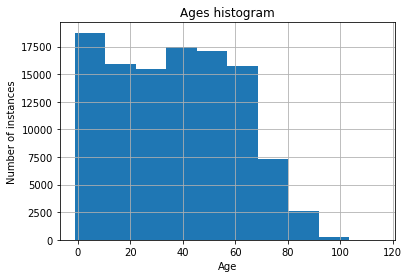

In [86]:
doc_df['Age'].hist()
plt.title('Ages histogram')
plt.xlabel('Age')
plt.ylabel('Number of instances');

In [87]:
print(min(doc_df['Age']))
print(max(doc_df['Age']))

-1
115


In [88]:
# there is only 1 -1 value, it might be worth removing it.
# All the other ages make sense; having an age of 0 means its a newborn
# and out of so many patients it is expected there are patients over 100,
# also patients could schedule more than one appointment
doc_df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [89]:
# Succesfully dropped row
doc_df.drop(doc_df[doc_df['Age']==-1].index.tolist(),inplace=True)
min(doc_df['Age'])

0

In [90]:
# This seemingly does not make sense, but when realizing that the time
# of AppointmentDay is set to the start of the day, it is expected...
# all the times that an appointment is set the same day, this argument will be true

(doc_df['AppointmentDay'] < doc_df['ScheduledDay']).sum()

38567

In [91]:
# to fix this, I will set the AppointmentDay to the end of the day.
# I'm not sure if this would change anything, but it makes more sense for the data
# Code from: https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

doc_df['AppointmentDay'] = doc_df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [92]:
# Now we know there are 5 rows that simply don't make sense. I will drop these rows
# https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

print((doc_df['AppointmentDay'] < doc_df['ScheduledDay']).sum())
doc_df = doc_df.loc[doc_df['AppointmentDay'] >= doc_df['ScheduledDay'],:].copy()

5


In [93]:
# Now we might want to consider feature engineering using the datetime
# objects, using them raw is not an option
# Because the dataset only spans a few months of a single year, we can't
# use the year, week of the year or day of the year as a feature.
# I believe the best course of action would be to use the day of the week
# as a feature for both dt columns

doc_df['AppointmentDay_dayofweek'] = doc_df['AppointmentDay'].dt.dayofweek
doc_df['ScheduledDay_dayofweek'] = doc_df['ScheduledDay'].dt.dayofweek

In [94]:
NoShow_filter = (doc_df['NoShow'] == 1)

In [95]:
NoShow_filter.sum()
doc_df['NoShow'].sum()

22314

34.31787218786412


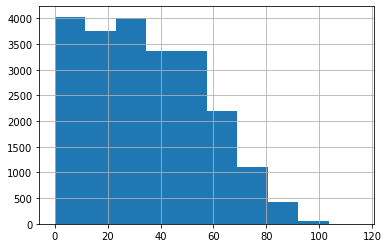

In [96]:
print(doc_df['Age'][NoShow_filter].mean())
doc_df['Age'][NoShow_filter].hist();

37.790504154999034


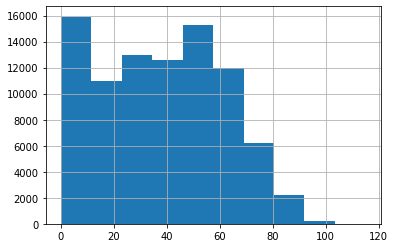

In [97]:
print(doc_df['Age'][~NoShow_filter].mean())
doc_df['Age'][~NoShow_filter].hist();

The distributions look similar, with those that did attend the appointment having a slightly higher mean age (37.8 vs. 34.3)

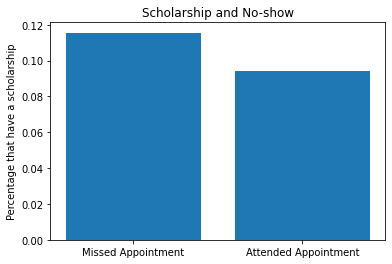

In [114]:
Scholarship_mean_list = [doc_df['Scholarship'][NoShow_filter].mean(), doc_df['Scholarship'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Scholarship_mean_list)
plt.title('Scholarship and No-show')
plt.ylabel('Percentage that have a scholarship');

It is more likely that a person who missed the appointment has a scholarship.

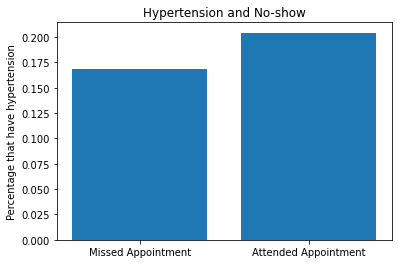

In [115]:
Hypertension_mean_list = [doc_df['Hypertension'][NoShow_filter].mean(), doc_df['Hypertension'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Hypertension_mean_list)
plt.title('Hypertension and No-show')
plt.ylabel('Percentage that have hypertension');

There is a difference between the two

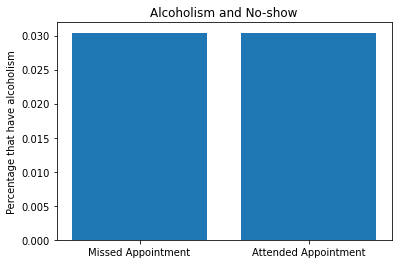

In [116]:
Alcoholism_mean_list = [doc_df['Alcoholism'][NoShow_filter].mean(), doc_df['Alcoholism'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],Alcoholism_mean_list)
plt.title('Alcoholism and No-show')
plt.ylabel('Percentage that have alcoholism');

There seems to be nearly no difference between them

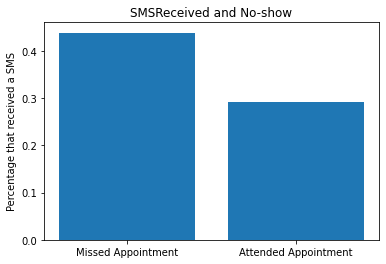

In [117]:
SMSReceived_mean_list = [doc_df['SMSReceived'][NoShow_filter].mean(), doc_df['SMSReceived'][~NoShow_filter].mean()]
plt.bar(['Missed Appointment', 'Attended Appointment'],SMSReceived_mean_list)
plt.title('SMSReceived and No-show')
plt.ylabel('Percentage that received a SMS');

Apparently, more often than to those than would attend their appointment, those that were going to miss the appointment were reminded by SMS.

# Prepare data for Machine Learning

In [102]:
doc_df.head(1)

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AppointmentDay_dayofweek,ScheduledDay_dayofweek
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4


In [103]:
# Trying out dropping the neighbourhood column because there are a lot of neighbourhoods
# and it slows down fitting, without necessarily meaning a better score.
X = doc_df.drop(columns=['PatientID', 'ScheduledDay', 'AppointmentDay','NoShow', 'Neighbourhood'])

X = pd.get_dummies(X,columns=['Gender'],drop_first=True)
# X = pd.get_dummies(X,columns=['Neighbourhood'])

In [104]:
X.head(1)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,AppointmentDay_dayofweek,ScheduledDay_dayofweek,Gender_M
AppointmentID,,,,,,,,,,
5642903,62,0,1,0,0,0,0,4,4,0


In [105]:
print(X['AppointmentDay_dayofweek'].value_counts())
print(X['ScheduledDay_dayofweek'].value_counts())

2    25866
1    25638
0    22713
4    19019
3    17246
5       39
Name: AppointmentDay_dayofweek, dtype: int64
1    26167
2    24259
0    23084
4    18915
3    18072
5       24
Name: ScheduledDay_dayofweek, dtype: int64


In [106]:
X = pd.get_dummies(X,columns=['AppointmentDay_dayofweek','ScheduledDay_dayofweek'])

In [107]:
X.head(1)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Gender_M,AppointmentDay_dayofweek_0,AppointmentDay_dayofweek_1,AppointmentDay_dayofweek_2,AppointmentDay_dayofweek_3,AppointmentDay_dayofweek_4,AppointmentDay_dayofweek_5,ScheduledDay_dayofweek_0,ScheduledDay_dayofweek_1,ScheduledDay_dayofweek_2,ScheduledDay_dayofweek_3,ScheduledDay_dayofweek_4,ScheduledDay_dayofweek_5
AppointmentID,,,,,,,,,,,,,,,,,,,,
5642903,62,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [108]:
y = doc_df['NoShow']

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

# Further feature engineering

In [110]:
# From here: https://towardsdatascience.com/feature-engineering-of-datetime-variables-for-data-science-machine-learning-45e611c632ad
# idea on feature engineering, where I will look at the time difference between ScheduledDay and AppointmentDay
# https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python

duration = doc_df['AppointmentDay'] - doc_df['ScheduledDay']
mylist = []
for thing in duration:
  duration_in_s = thing.total_seconds()
  mylist = mylist + [divmod(duration_in_s, 86400)[0]]

In [111]:
# Adding the difference in days as a feature in the X matrix 
X['DifferenceSchedApp'] = mylist

In [124]:
import statistics as stats
stats.median(mylist)

4.0

In [125]:
diff_filter = X['DifferenceSchedApp']>4

In [127]:
doc_df['NoShow'][diff_filter].mean()

0.30641997153517714

In [128]:
doc_df['NoShow'][~diff_filter].mean()

0.10904368923744596

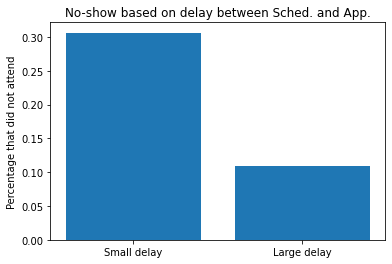

In [129]:
# Unexpectedly, it seems like with a large delay, there is a smaller chance to miss the appointment.
mean_list = [doc_df['NoShow'][diff_filter].mean(), doc_df['NoShow'][~diff_filter].mean()]
plt.bar(['Small delay', 'Large delay'],mean_list)
plt.title('No-show based on delay between Sched. and App.')
plt.ylabel('Percentage that did not attend');

# Further visualizations

In [45]:
import plotly.express as px
# fig = px.imshow()
# fig.show()

# Machine Learning models

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [113]:
# Any model with an accuracy below 79.8% will be worse than the baseline model
1-y.mean()

0.7981017182254956

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7677608483225363

In [49]:
neighbor_range = [1,2,3,4,5]
AccList = []

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

for neighbor in neighbor_range:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train_sc,y_train)
  AccList = AccList +  [knn.score(X_test_sc,y_test)]

In [50]:
AccList

[0.7126054069704317,
 0.7770981868191524,
 0.7475299482465347,
 0.7816220911295284,
 0.7654808005501068]

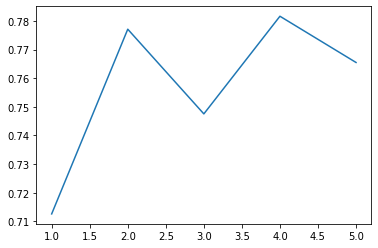

In [51]:
plt.plot(neighbor_range,AccList)

In [52]:
neighbor_range[AccList.index(max(AccList))]

4

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_sc)
pca.explained_variance_ratio_.shape

(20,)

Text(0, 0.5, 'Proportion of Explained Variance')

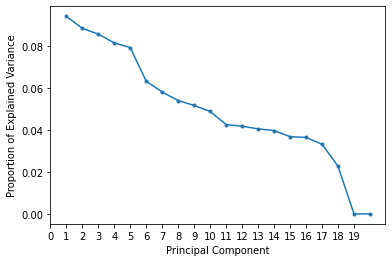

In [54]:
# Plot the explained variance ratios of the first 10 principal components
plt.plot(range(1, 21), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(0, 20))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [55]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [56]:
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [57]:
neighbor_range = list(range(2,105,20))
AccList = []

for neighbor in neighbor_range:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train_pca,y_train)
  AccList = AccList +  [knn.score(X_test_pca,y_test)]

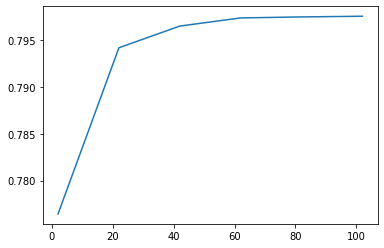

In [58]:
plt.plot(neighbor_range,AccList)

In [59]:
neighbor_range[AccList.index(max(AccList))]

102

In [62]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca,y_test)

0.7975462343020521

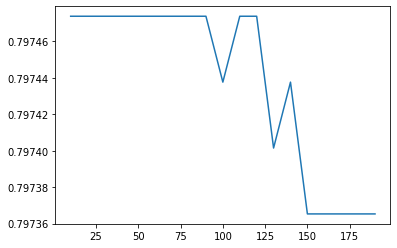

In [61]:
from xgboost import XGBClassifier

estimator_range = list(range(10,200,10))
AccList = []

for estimator in estimator_range:
  xgb=XGBClassifier(n_estimators=estimator)
  xgb.fit(X_train_sc,y_train)
  AccList = AccList + [xgb.score(X_test_sc,y_test)]

plt.plot(estimator_range,AccList)

In [63]:
n_est = estimator_range[AccList.index(max(AccList))]

xgb=XGBClassifier(n_estimators=n_est)
xgb.fit(X_train_sc,y_train)
xgb.score(X_test_sc,y_test)

0.7974738518330861

In [66]:
from sklearn.ensemble import RandomForestClassifier
estimator_range = list(range(100,300,10))
AccList = []

for estimator in estimator_range:
  RF=RandomForestClassifier(n_estimators=estimator)
  RF.fit(X_train,y_train)
  AccList = AccList + [RF.score(X_test,y_test)]

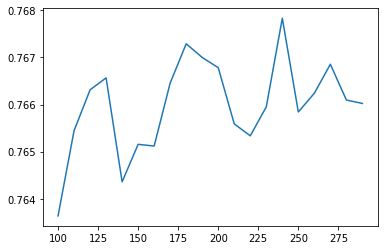

In [67]:
plt.plot(estimator_range,AccList)

From these models we can see that the best result is achieved by a PCA-transformed set used in KNearestNeighborClassifier, and more specifically with 100 neighbors.

The main issue with this data set is the low number (only around 20% of all of the entries) of No-shows. Because of this, a model that only predicts 'No' in No-show will already have a relatively high (~80%) accuracy.